In [2]:
# standard import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

# modeling imports
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Import train_test_split.
from sklearn.model_selection import train_test_split


In [3]:
houses = pd.read_csv("/content/drive/MyDrive/Capstone Project_Kira/chicago_housing.csv")

In [ ]:
# Let's start with preprocessing

In [4]:
houses.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [5]:
houses.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Data Cleaning

In [6]:
houses.dropna(inplace=True)


In [8]:
houses.fillna(houses.mean(), inplace=True)

In [9]:
houses.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
149,32.0,4.0,1065.0,7.0,25.0,492.0,1.5,0.0,0.0
151,42.0,3.0,585.0,5.0,50.0,713.0,1.0,0.0,0.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0


In [10]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      128 non-null    float64
 1   Bedroom    128 non-null    float64
 2   Space      128 non-null    float64
 3   Room       128 non-null    float64
 4   Lot        128 non-null    float64
 5   Tax        128 non-null    float64
 6   Bathroom   128 non-null    float64
 7   Garage     128 non-null    float64
 8   Condition  128 non-null    float64
dtypes: float64(9)
memory usage: 10.0 KB


In [11]:
houses.isnull().sum()

,0
Price,0
Bedroom,0
Space,0
Room,0
Lot,0
Tax,0
Bathroom,0
Garage,0
Condition,0


In [12]:
houses.dtypes

,0
Price,float64
Bedroom,float64
Space,float64
Room,float64
Lot,float64
Tax,float64
Bathroom,float64
Garage,float64
Condition,float64


In [ ]:
# EDA

In [13]:
# Make Prediction; variables (X) and target (y)
FEATURES = ['Bedroom','Space', 'Room', 'Lot','Bathroom','Tax', 'Garage']

X = houses[FEATURES]
y = houses['Price'].values

# Verify dimensions
print('X: ', X.shape)
print('y: ', y.shape)

X:  (128, 7)
y:  (128,)


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


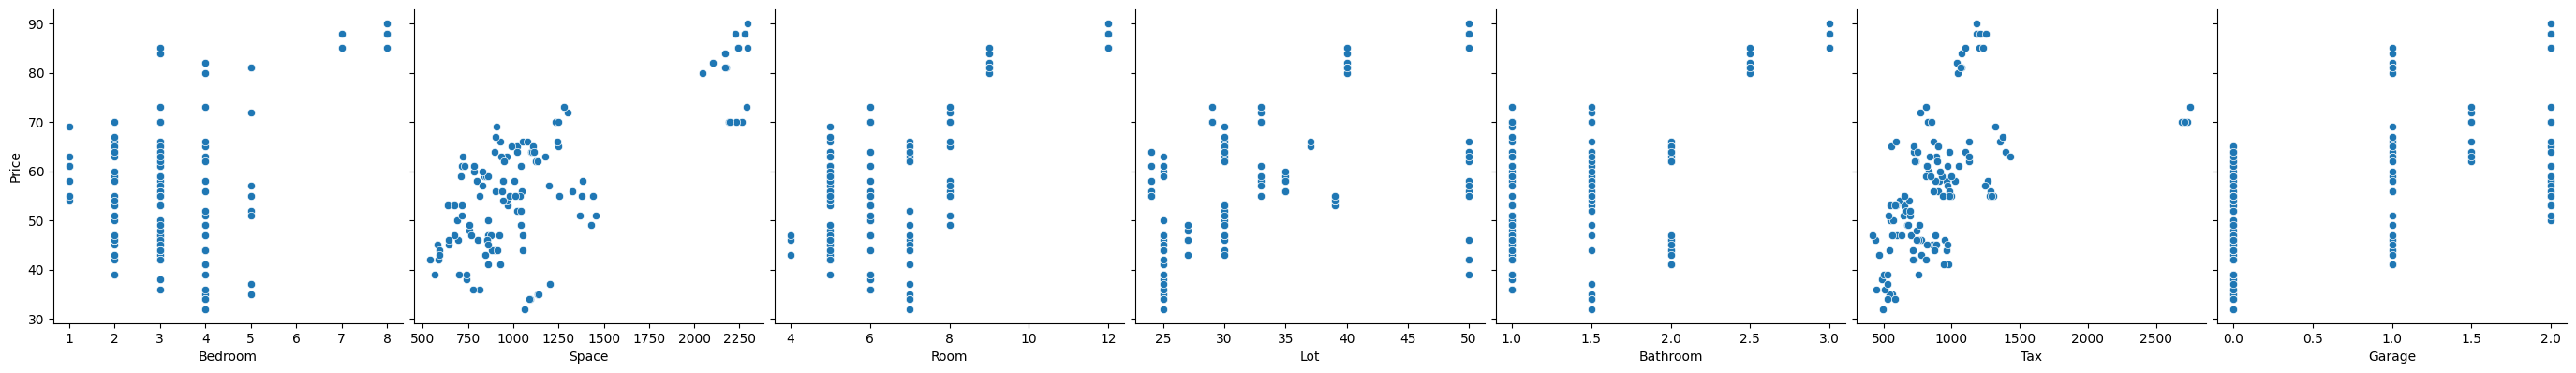

In [15]:
# Show the correlations
sns.pairplot(houses,x_vars=['Bedroom','Space', 'Room', 'Lot', 'Bathroom', 'Tax','Garage'],y_vars=['Price'],size=4,aspect=1,kind='scatter')

In [ ]:
# Linear Regression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X, y)

LinearRegression()

In [18]:
# y intercept (constant)
lr.intercept_

21.169985908533683

In [19]:
# coefficients (slope)
lr.coef_

array([-3.44925040e+00,  1.09467312e-02,  1.76425493e+00,  2.33813789e-01,
        5.90997699e+00,  3.14860162e-03,  4.37700721e+00])

In [20]:
set(zip(X.columns, lr.coef_,))

{('Bathroom', 5.909976991849277),
 ('Bedroom', -3.449250404770204),
 ('Garage', 4.377007206174101),
 ('Lot', 0.23381378944139988),
 ('Room', 1.76425493168432),
 ('Space', 0.01094673121731806),
 ('Tax', 0.0031486016219375336)}

In [21]:
lr.coef_.sum()

8.849897847218148

In [ ]:
# Value the score

In [22]:
# Make prediction
y_pred = lr.predict(X)

In [23]:
#mse #closed to 0 is good
metrics.mean_squared_error(y, y_pred)

50.264042685430454

In [24]:
# Compute R2 from metrics # closed to 1 is good
metrics.r2_score(y, y_pred)

0.7156945204631002

In [ ]:
# LINEM Assumption method

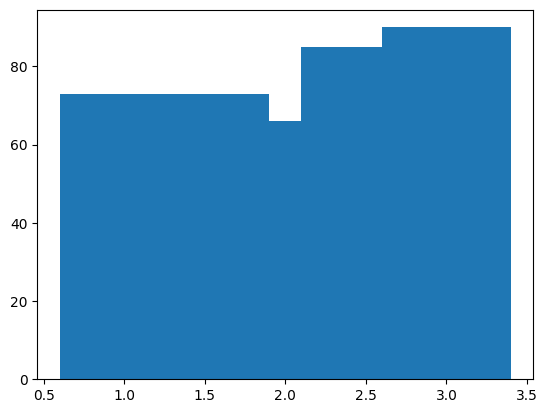

In [25]:
# L for linearity

plt.bar(X['Bathroom'], y);

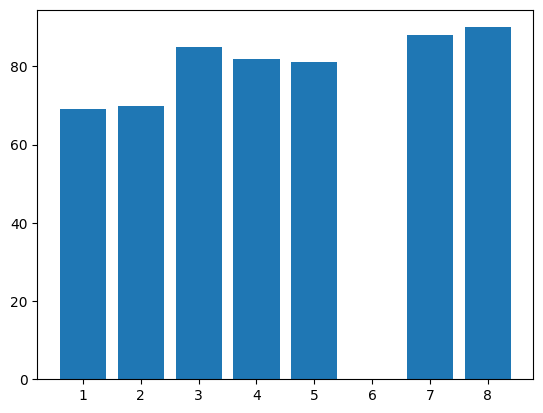

In [ ]:
plt.bar(X['Bedroom'], y);

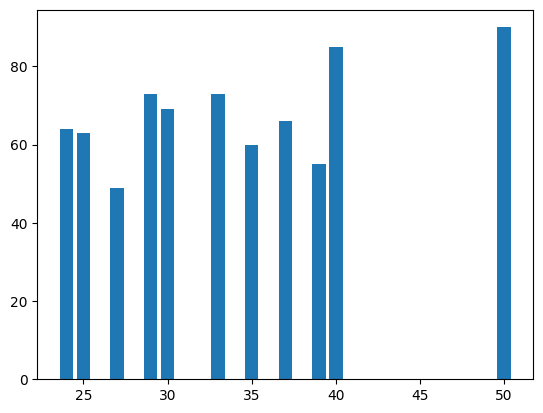

In [ ]:
plt.bar(X['Lot'], y);

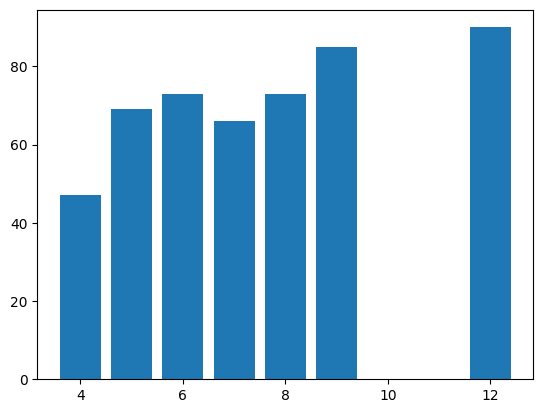

In [ ]:
plt.bar(X['Room'], y);

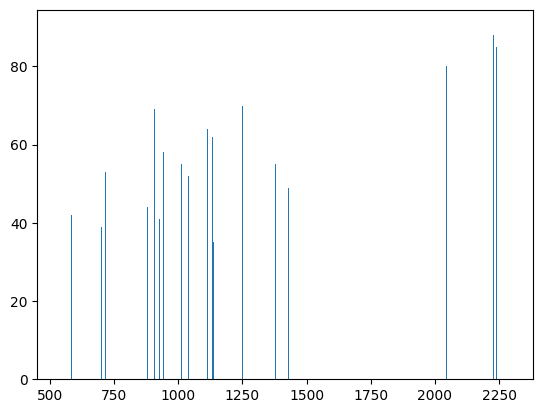

In [ ]:
plt.bar(X['Space'], y);

In [ ]:
# I for independent variable
# This data is not a time series

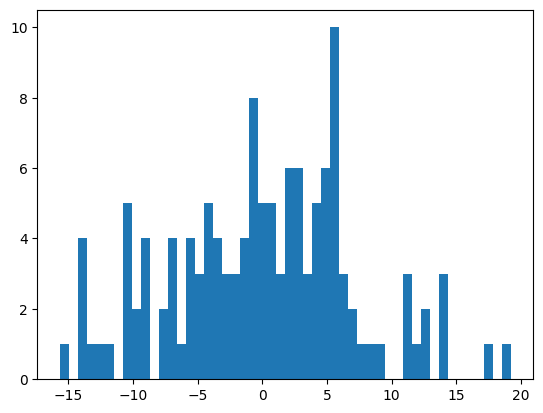

In [ ]:
# N is for normality
resids = (y - y_pred)

plt.hist(resids, bins=50);

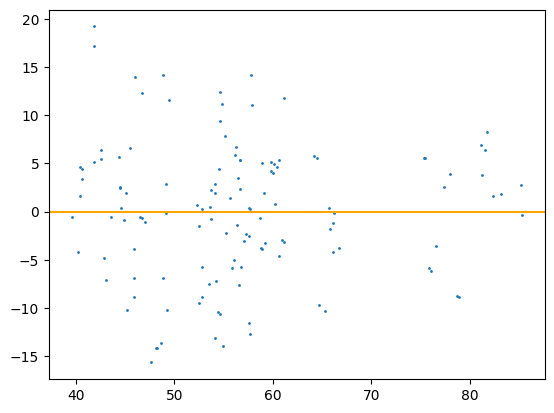

In [ ]:
# E - Equal variance of errors
plt.scatter(y_pred, resids, s=1)
plt.axhline(0, color="orange")

In [ ]:
# M/I: #get the correlation about columns in the dataset.
houses.corr()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
Price,1.000000,0.321623,0.739074,0.578310,0.467262,0.505958,0.567729,0.555242,0.137773
Bedroom,0.321623,1.000000,0.581410,0.841807,0.357425,0.045922,0.621555,0.189651,-0.116611
Space,0.739074,0.581410,1.000000,0.761927,0.422497,0.609800,0.598866,0.407141,0.079876
Room,0.578310,0.841807,0.761927,1.000000,0.499721,0.142749,0.767886,0.285706,0.039036
Lot,0.467262,0.357425,0.422497,0.499721,1.000000,0.202397,0.421500,0.154071,-0.037464
Tax,0.505958,0.045922,0.609800,0.142749,0.202397,1.000000,0.018013,0.420709,-0.133850
Bathroom,0.567729,0.621555,0.598866,0.767886,0.421500,0.018013,1.000000,0.269352,-0.005469
Garage,0.555242,0.189651,0.407141,0.285706,0.154071,0.420709,0.269352,1.000000,0.125645
Condition,0.137773,-0.116611,0.079876,0.039036,-0.037464,-0.133850,-0.005469,0.125645,1.000000


<Axes: >

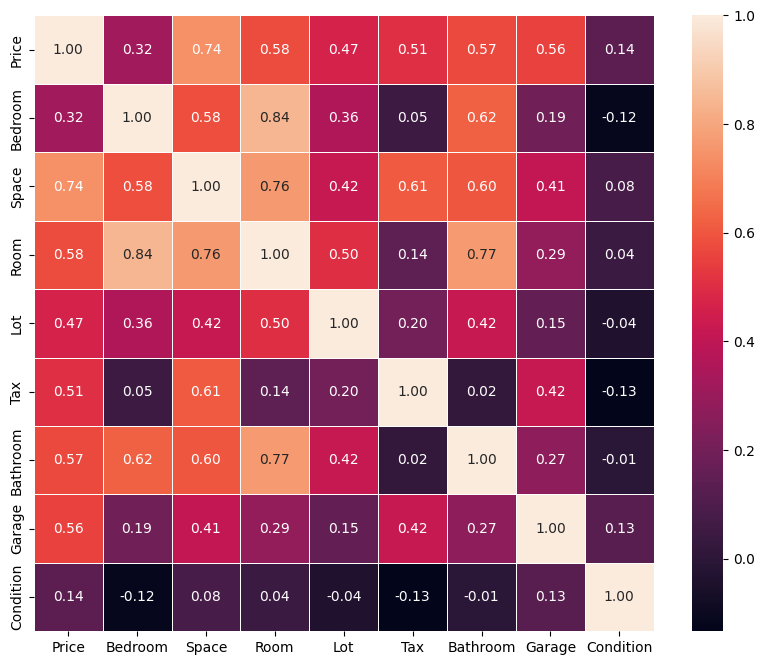

In [ ]:
corr = houses.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5)

In [ ]:
# Test-Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-3.52518862e+00,  1.39207477e-02,  1.93721818e+00,  1.70826332e-01,
        3.67153205e+00,  2.70420346e-04,  3.50174571e+00])

In [ ]:
set(zip(X_train, lr.coef_,))

{('Bathroom', 3.6715320531897886),
 ('Bedroom', -3.5251886185728387),
 ('Garage', 3.5017457055828807),
 ('Lot', 0.1708263317100594),
 ('Room', 1.937218183352874),
 ('Space', 0.013920747657911701),
 ('Tax', 0.00027042034612894403)}

In [ ]:
# Make predictions for training
predictions_train = lr.predict(X_train)

In [ ]:
# R2_train
metrics.r2_score(y_train, predictions_train)

0.6856856571812836

In [ ]:
# Make predictions for test
predictions_test = lr.predict(X_test)

In [ ]:
# R2_test
metrics.r2_score(y_test, predictions_test)

0.7243155327085644